## 1. Nobel
El Premio Nobel es quizás el premio científico más conocido del mundo.A excepción del honor, el prestigio y el premio sustancial, el destinatario también obtiene una medalla de oro que muestra a Alfred Nobel (1833 - 1896) que estableció el premio.Cada año, se le da a científicos y académicos en las categorías química, literatura, física, fisiología o medicina, economía y paz.El primer Premio Nobel fue entregado en 1901, y en ese momento el premio fue muy eurocéntrico y enfocado por los hombres, pero hoy en día no está sesgado de ninguna manera.Seguramente.¿Derecha?

Bueno, vamos a descubrirlo!La Fundación Nobel ha hecho que un conjunto de datos esté disponible de todos los ganadores del premio desde el inicio del premio, en 1901, a 2016. Vamos a cargarlo y echar un vistazo.


In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

#Leyendo el Archivo
nobel = pd.read_csv('datasets/nobel.csv')

#Echar un vistaso a los primeros ganadores
nobel.head(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


## 2. Entonces, quien obtiene el premio?

Simplemente mirando a los primeros pares de ganadores de premios, o laureat Nobel, ya que también se les 
llama, ya vemos una celebridad: Wilhelm Conrad Röntgen, el tipo que descubrió radiografías.
Y en realidad, vemos que todos los ganadores en 1901 eran tipos que vinieron de Europa.
Pero eso fue en 1901, mirando a todos los ganadores en el conjunto de datos, de 1901 a 2016, 
¿qué sexo y qué país se representa más comúnmente?

(Para el país, usaremos el nacimiento del ganador, ya que la organización_country es NAN 
 para todos los premios Nobel compartidos).



In [17]:
# Mostrar el número de premios Nobel (posiblemente compartidos) entregados

display(len(nobel))

#Mostrar el número de premios ganados por hombres y mujeres.
display(nobel['sex'].value_counts())

# Muestra el número de premios ganados por las 10 primeras nacionalidades.
nobel['birth_country'].value_counts().head(10)






911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

## 3. USA dominance

Quizás no sea tan sorprendente: el premio Nobel más común entre 1901 y 2016 fue un hombre nacido en los Estados Unidos de América. Pero en 1901 todos los ganadores eran europeos. ¿Cuándo empezó Estados Unidos a dominar las listas de premios Nobel?

In [18]:
nobel['usa_born_winner']= nobel['birth_country']=='United States of America'

nobel['decade']= (np.floor(nobel['year']/10)*10).astype(int)
#as_index=False, ingresa un indice numerico
prop_usa_winners = nobel.groupby(['decade'], as_index=False)['usa_born_winner'].mean()


In [19]:
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


## 4. Dominancia de USA, Visualizacion 


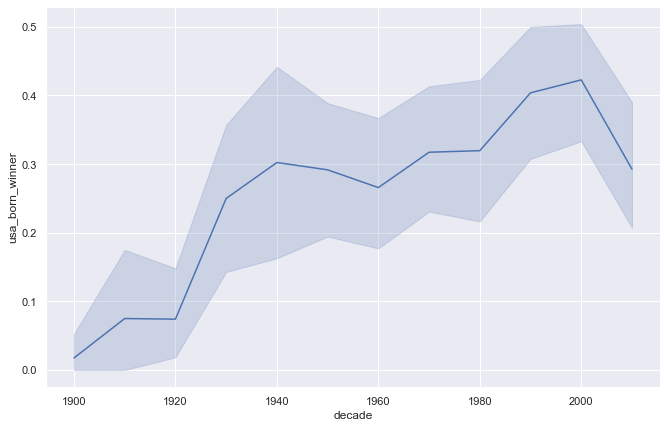

In [20]:
# Fijación del tema del gráfico
sns.set()
# y la fijación del tamaño de todas los graficos.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='usa_born_winner',data=nobel)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
plt.show()

5. ¿Cuál es el género de un típico ganador del Premio Nobel?

Estados Unidos se convirtió en el ganador dominante del Premio Nobel por primera vez en la década de 1930 y ha mantenido la posición de liderazgo desde entonces. Pero un grupo que estuvo a la cabeza desde el principio, y que parece no soltarlo nunca, son los hombres. Tal vez no debería sorprender que haya un cierto desequilibrio entre el número de ganadores de premios masculinos y femeninos, pero ¿hasta qué punto es significativo este desequilibrio? ¿Y es mejor o peor dentro de categorías específicas de premios como física, medicina, literatura, etc.?

In [21]:
nobel['female_winner'] = nobel['sex']=='Female'
nobel['female_winner'].head()

0    False
1    False
2    False
3    False
4    False
Name: female_winner, dtype: bool

In [22]:
prop_female_winners = nobel.groupby(['decade','category'], as_index= False)['female_winner'].mean()

In [23]:
display(prop_female_winners)

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
61,2010,Economics,0.000000
62,2010,Literature,0.285714
63,2010,Medicine,0.125000
64,2010,Peace,0.400000


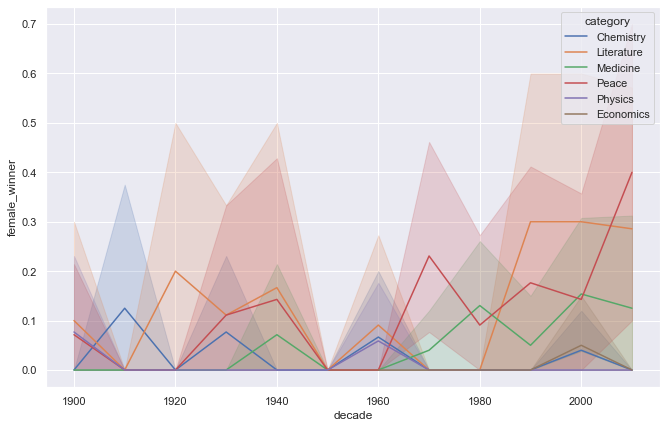

In [24]:
# Fijación del tema del gráfico
sns.set()
# y la fijación del tamaño de todas los graficos.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='female_winner',data=nobel,hue='category')

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
plt.show()

## 6. La primera mujer en ganar el Premio Nobel
El gráfico anterior es un poco desordenado, ya que las líneas están sobretrazadas. Pero muestra algunas tendencias y
patrones interesantes. En general, el desequilibrio es bastante grande, siendo la física, la economía y la química 
las que presentan un mayor desequilibrio. La medicina presenta una tendencia algo positiva y, desde los años 90, el
premio de literatura también está más equilibrado. El premio de la paz es el más atípico de la década de 2010, pero
hay que tener en cuenta que sólo abarca los años 2010 a 2016.

Teniendo en cuenta este desequilibrio, ¿quién fue la primera mujer en recibir un Premio Nobel? ¿Y en qué categoría?



In [33]:
# Elegir a la primera mujer que gana un Premio Nobel
nobel[nobel['female_winner']==True].nsmallest(1,'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,36.0


## 7. Repetición de premios

Para la mayoría de los científicos/escritores/activistas, un Premio Nobel sería la coronación de una larga carrera.
Pero para algunos, uno no es suficiente, y pocos lo han obtenido más de una vez. ¿Quiénes son estos pocos 
afortunados? (Al no haber ganado yo ningún Premio Nobel, asumiré que se trata sólo de suerte).

In [26]:
nobel.groupby('full_name').filter(lambda x : len(x)>1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


## 8. ¿Cuántos años tienes cuando recibes el premio?
La lista de ganadores repetidos contiene algunos nombres ilustres. Volvemos a encontrarnos con Marie Curie, que obtuvo el premio en física por descubrir la radiación y en química por aislar el radio y el polonio. John Bardeen lo obtuvo dos veces en física por los transistores y la superconductividad, Frederick Sanger lo obtuvo dos veces en química, y Linus Carl Pauling lo obtuvo primero en química y después en la paz por su trabajo en la promoción del desarme nuclear. También nos enteramos de que las organizaciones también reciben el premio, ya que tanto la Cruz Roja como el ACNUR lo han obtenido en dos ocasiones.

Pero, ¿cuántos años se tienen generalmente cuando se obtiene el premio?

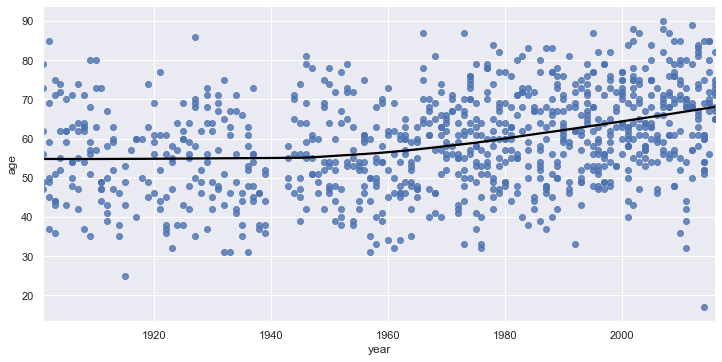

In [35]:
# Convertir birth_date de String a datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], format='%Y-%m-%d')

# Calculando la edad de los ganadores del Premio Nobel
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel, lowess=True, aspect=2, line_kws={'color':'black'})

## 9. Diferencias de edad entre las categorías de premios
El gráfico anterior nos muestra muchas cosas. Vemos que la gente solía tener alrededor de 55 años cuando recibía el premio, pero hoy en día la media está más cerca de los 65 años. Sin embargo, hay una gran diferencia de edad entre los premiados, y aunque la mayoría tiene más de 50 años, algunos son muy jóvenes.

También vemos que la densidad de puntos es mucho mayor hoy en día que a principios del siglo XX: hoy en día se reparten muchos más premios, por lo que hay muchos más ganadores. También vemos que hubo una interrupción en los premios otorgados alrededor de la Segunda Guerra Mundial (1939 - 1945).

Veamos las tendencias de edad dentro de las diferentes categorías de premios.


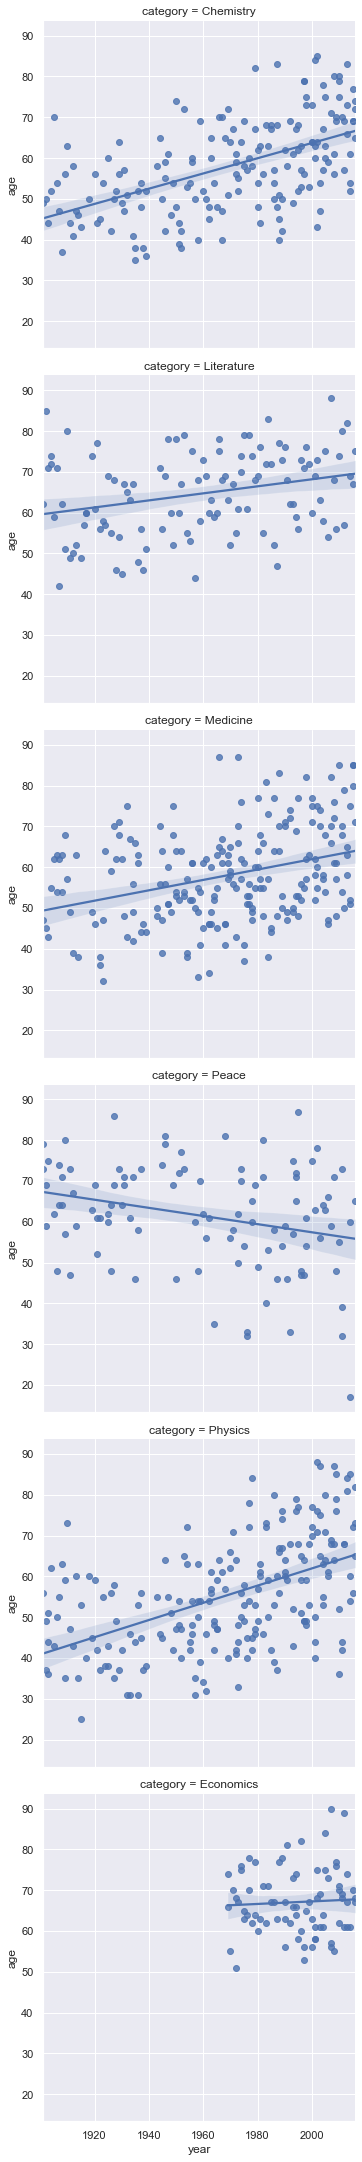

In [36]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age', data=nobel, row='category')

## 10. Ganadores más antiguos y más jóvenes
¡Más parcelas con un montón de cosas emocionantes! Vemos que los ganadores de los premios de química, medicina y física han envejecido con el tiempo. La tendencia es más fuerte en el caso de la física: la edad media solía estar por debajo de los 50 años, y ahora es de casi 70. La literatura y la economía son más estables. También vemos que la economía es una categoría más reciente. Pero la paz muestra una tendencia opuesta: ¡los ganadores son cada vez más jóvenes!

En la categoría de paz también tenemos un ganador en torno a 2010 que parece excepcionalmente joven. Esto nos lleva a preguntarnos quiénes son las personas más jóvenes y más viejas que han ganado un Premio Nobel.

In [37]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


## 11. Tienes un premio! 


Oye, tienes un premio por haber llegado hasta el final de este cuaderno. Puede que no sea un premio Nobel, pero lo he hecho yo mismo en pintura, así que debería contar para algo. Pero no desesperes, Leonid Hurwicz tenía 90 años cuando recibió su premio, así que puede que no sea demasiado tarde para ti. Quién sabe.

Antes de que te vayas, ¿cómo se llama la ganadora más joven de la historia, que en 2014 recibió el premio por "su lucha contra la supresión de los niños y los jóvenes y por el derecho de todos los niños a la educación"?

In [38]:
# El nombre del ganador más joven del Premio Nobel a partir de 2016
youngest_winner = 'Malala Yousafzai'